In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',sep=',',index_col=0)
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
######## 데이터 탐색 ##########

In [ ]:
1. 시각적 탐색

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
Year: 년도가 소숫점 형태로 되어있음. 정수 형태로 수정

이외 특별한 문제점 X


In [ ]:
2. 프로그래매틱 탐색

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
Year,Genre,Publisher 칼럼에 결측치 삭제 필요
NA_Sales,EU_Sales,JP_Sales 칼럼들은 수치형태로 변화
Sales 칼럼들에 M과 K 같이 단위들이 통일되지않음

In [ ]:
df[df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull()].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
549,Transworld Surf,XB,NaN,Sports,Atari,0.1,0.03,0,0
676,Battle vs. Chess,PS3,NaN,Misc,TopWare Interactive,0,0.04,0,0.01


In [ ]:
df.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [ ]:
Year의 최솟값이 0으로 나타나는걸 알수있다. 수정 필요

In [ ]:
### 중복된 데이터 확인 ###

In [ ]:
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [ ]:
중복 데이터 삭제 필요

In [ ]:
### 구조적 문제 탐색 ###

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
### 데이터 품질 문제 종합 ###
Year: 년도가 소숫점 형태로 되어있음. 정수 형태로 수정
Year의 최솟값이 0
Year,Genre,Publisher 칼럼에 결측치
NA_Sales,EU_Sales,JP_Sales 칼럼들은 실수 형태로 수정
중복 데이터가 하나로 발견된다.
Sales 칼럼들에 M과 K 같은 숫자 단위 통일

In [ ]:
### 생각 ###
1. 매출액 총합 칼럽이 필요하지않을까?
2. 특정 지역이 특정 장르or게임사를 선호하는지.. 특정 년도에 특정 장르or게임사가 흥했다던지..
같은 년도별or지역별 유행 조건이 있다면 찾아봐야겠다.

In [ ]:
df_clean = df.copy()

In [ ]:
## Sales 칼럼들 M,K 화폐단위 삭제 및 실수형 변환

df_clean['NA_Sales'] = df_clean['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df_clean['EU_Sales'] = df_clean['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df_clean['JP_Sales'] = df_clean['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df_clean['Other_Sales'] = df_clean['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

In [ ]:
## 결측값 중간 확인

df_clean.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 결측치의 갯수들은 전체 데이터의 규모에 비해 매우 작은 양이므로 삭제하도록 한다.

In [ ]:
df_clean = df_clean.dropna(axis=0)
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
### Year 함수를 int 형으로 변환
df_clean['Year'] = df_clean['Year'].astype('int')
df_clean.Year.head(10)

1     2008
2     2009
3     2010
4     2010
5     2010
6     2005
7     2011
8     2005
9     2007
10    2011
Name: Year, dtype: int64

In [ ]:
df_clean.Year.sort_values().head(10)

9277     0
16395    0
14667    0
2250     1
8682     1
11164    2
15613    2
8145     2
8913     3
8510     3
Name: Year, dtype: int64

In [ ]:
### 연도 데이터치고 이상한 숫자들이 보인다..

In [ ]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
Year 컬럼에서 작은 값들이 발견된다. 20이하 숫자들은 20XX 형태로 수정하고 그 이상의 숫자들은 19XX가 되도록 한다.

In [ ]:
df_clean.Year.sort_values().head(10)

9277     0
16395    0
14667    0
2250     1
8682     1
11164    2
15613    2
8145     2
8913     3
8510     3
Name: Year, dtype: int64

In [ ]:
# 함수를 통해 20이하 숫자들은 20XX 형태로 수정하고 그 이상의 숫자들은 19XX가 되도록 한다.

def Year(x):
    if  x < 22:    
        return (x + 2000)
    elif (x>20) & (x<100):
        return (x + 1900)
    else: 
       return (x)

In [ ]:
df_clean['Year'] = df_clean['Year'].apply(Year)
df_clean.Year.sort_values().head(10)

14265    1980
5724     1980
15013    1980
9227     1980
13134    1980
10122    1980
7318     1980
5939     1980
1061     1981
1309     1981
Name: Year, dtype: int64

In [ ]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234
std,5.832087,0.822431,0.508340,0.309272,0.189678
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [ ]:
# 중복 데이터 삭제
df_clean[df_clean.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
df_clean.reset_index(drop=True,inplace=True)
df_clean.tail(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16240,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
### 미국,유럽,일본,기타 지역의 매출을 전부 합쳐진 새로운 열을 만든다.

In [ ]:
df_clean['Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [ ]:
########### 데이터 분석 시각화 ##############

In [ ]:
### 지역별 게임 장르 선호도 ###

In [ ]:
Genre_region = df_clean.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
Genre_region.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


No handles with labels found to put in legend.


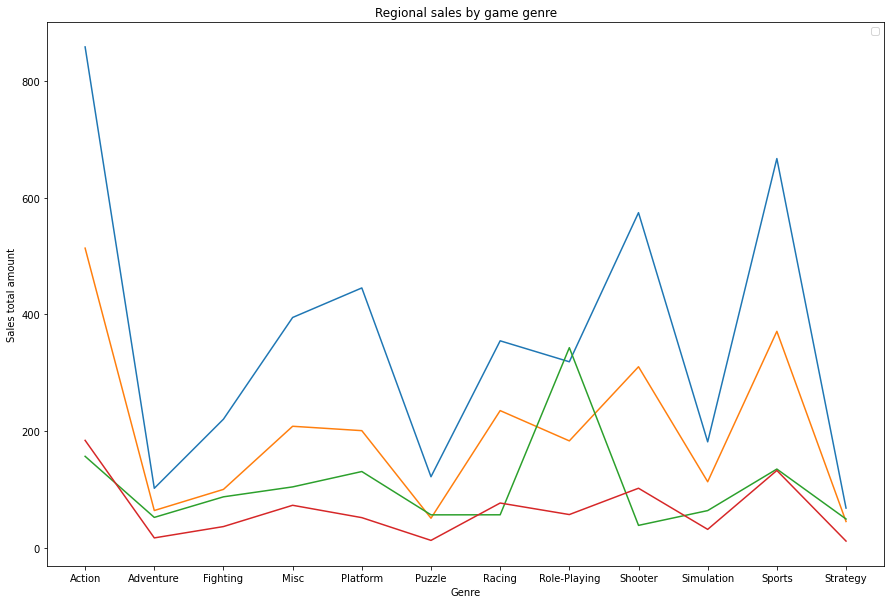

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(Genre_region)
label = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

plt.xlabel('Genre')
plt.ylabel('Sales total amount')
plt.title('Regional sales by game genre')
plt.legend()

plt.show()

In [ ]:
####### 분석
일본을 제외한 지역들은 액션 게임을 가장 선호하고 그 다음으로 스포츠 게임을 선호한다. 
일본은 RPG 게임을 가장 선호하고 그 다음으로 액션 게임을 선호하는 경향을 보인다.

In [ ]:
### 연도별 게임의 트렌드 ### Game trends by year

In [ ]:
data1 = df_clean[['Year','Genre','Sales']]
data1.head()

,Year,Genre,Sales
0,2008,Action,0.04
1,2009,Action,0.18
2,2010,Adventure,0.02
3,2010,Misc,0.04
4,2010,Platform,0.25


In [ ]:
data2=data1.groupby(['Year','Genre'],as_index=False)['Sales'].sum()
data2.head(10)

,Year,Genre,Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
5,1981,Platform,6.92
6,1981,Puzzle,2.25
7,1981,Racing,0.48
8,1981,Shooter,10.02
9,1981,Simulation,0.44


In [ ]:
import plotly.express as px
plt.figure(figsize=(25, 10))
fig = px.line(data2,x='Year',y='Sales',color='Genre',title='Genre Trends by Year')
fig.show()

<Figure size 1800x720 with 0 Axes>

In [ ]:
####### 분석 ########
80년대엔 퍼즐 게임이 강세를 보이다 점차 줄어들기 시작한다.
90년대부터 액션게임과 스포츠의 점점 성장하기 시작해 2000년대부터 가장 많이 팔린다.
2008년 전세계 게임 매출 총액이 역대 가장 높았으나 이후 꾸준히 줄어들기 시작한다.

In [ ]:
### 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 ###

In [ ]:
data3 = df_clean[['Name','Platform','Genre','Publisher','Sales']]
data3.head(10)

,Name,Platform,Genre,Publisher,Sales
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04
1,The Munchables,Wii,Action,Namco Bandai Games,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.02
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.25
5,Power Pro Kun Pocket 8,DS,Sports,Konami Digital Entertainment,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,Simulation,Deep Silver,0.03
7,Samurai Warriors: State of War,PSP,Action,Tecmo Koei,0.19
8,Imabikisou,PS3,Adventure,Sega,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,Action,THQ,0.08


In [ ]:
Top100_game = data3.sort_values(by=['Sales'], ascending=False).head(100)
Top100_game.head()

,Name,Platform,Genre,Publisher,Sales
2855,Wii Sports,Wii,Sports,Nintendo,82.74
4113,Super Mario Bros.,NES,Platform,Nintendo,40.24
12316,Mario Kart Wii,Wii,Racing,Nintendo,35.83
3288,Wii Sports Resort,Wii,Sports,Nintendo,33.00
7673,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.38


In [ ]:
Publisher_rank = Top100_game['Publisher'].value_counts()
Publisher_rank

Nintendo                       51
Activision                     15
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: Publisher, dtype: int64

<BarContainer object of 11 artists>

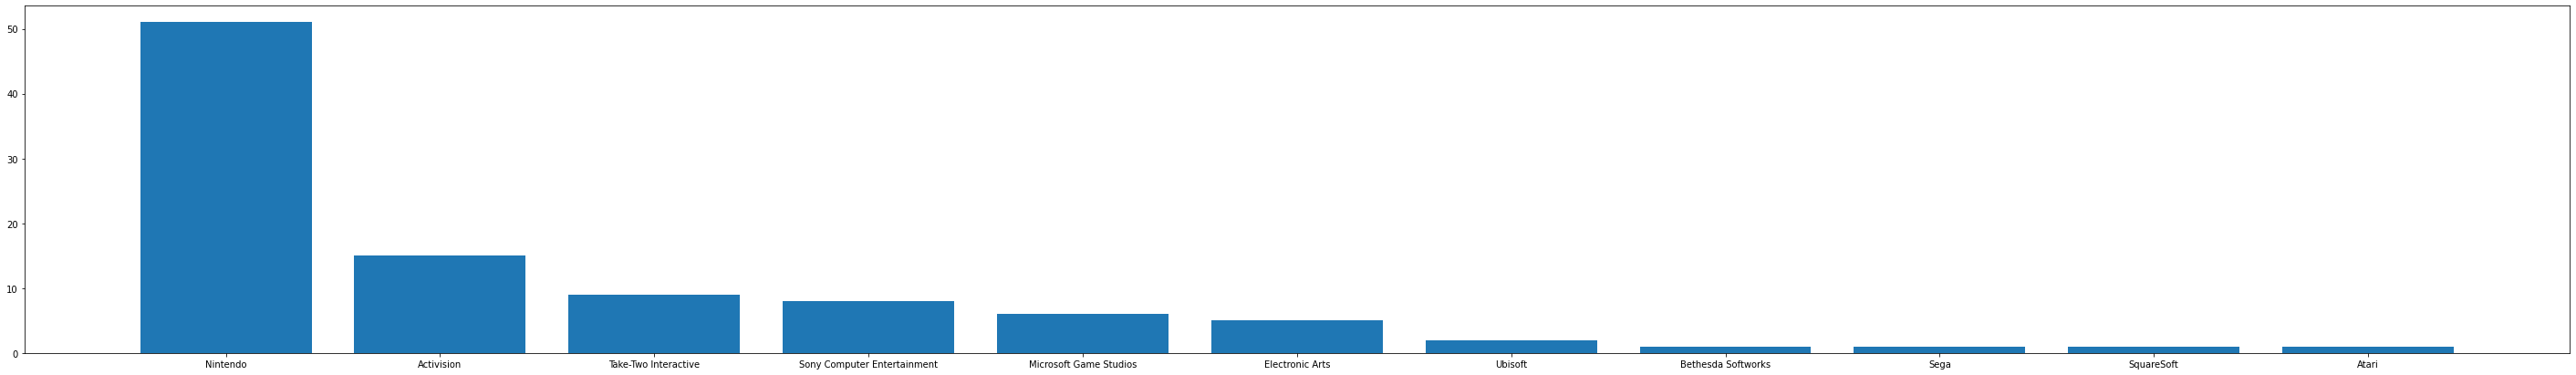

In [ ]:
plt.figure(figsize=(50, 7))
plt.bar(Publisher_rank.index,Publisher_rank)

In [ ]:
Genre_rank = Top100_game['Genre'].value_counts()
Genre_rank

Shooter         23
Platform        16
Role-Playing    14
Action          13
Racing          10
Misc             8
Sports           6
Simulation       4
Puzzle           3
Fighting         2
Adventure        1
Name: Genre, dtype: int64

<BarContainer object of 11 artists>

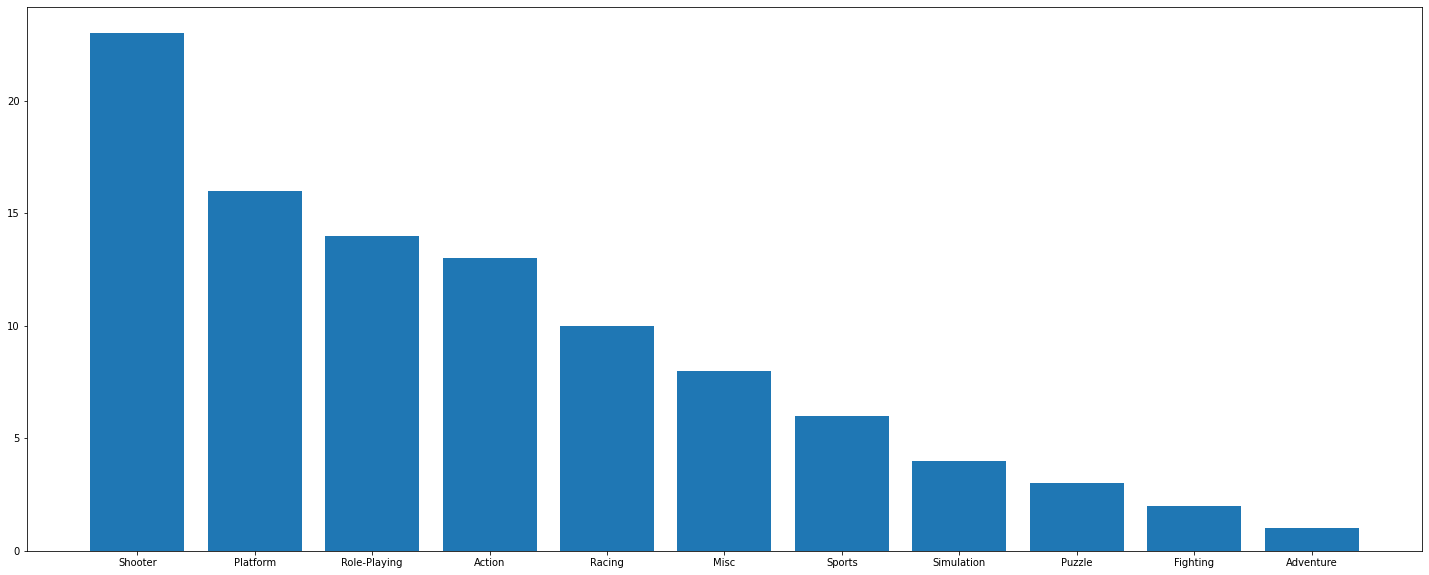

In [ ]:
plt.figure(figsize=(25, 10))
plt.bar(Genre_rank.index,Genre_rank)

In [ ]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

1. 게임 데이터를 분석한 결과 하나의 게임을 여러 플랫폼에서 즐길수 있게 지원하는 경우가 많았다.
2. 최상위권 매출의 회사들을 정렬한 결과 닌텐도의 비중이 매우 높았음을 알수있었다.
3. 슈팅 게임의 수요가 여전히 가장 많았던것을 알수있었다.


안정적인 플랫폼과 개발 노하우가 있는 닌텐도를 롤모델로 삼아 게임을 만들거나 / 닌텐도와의 협업을 통해 게임을 개발한다.
슈팅 게임을 개발의 최우선으로 둔다. 

비디오 시장의 수요가 점점 내려가고 있는 상황이라 개발 선정에 다소 신중해야할 필요가 있다.

In [ ]:
# 슈팅 장르로 닌텐도 플랫폼으로 닌텐도를 모티브로 하여 게임을 설계하는것이 회사가 최대의 이익을 얻을수 있을것이다.